---

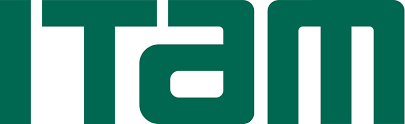

In [76]:
# Inicio de M para usuarios.
from IPython.core.display import Image, display
from tqdm import tqdm
display(Image('itam_logo.png', width=700, unconfined=True))

---

<font color='#508072'> 
$ \Large \textbf {Data science and machine learning applied to financial markets} $

<font color='#508072'> 
$ \normalsize \textbf {Author: Daniel Omar Becerril Olguín} $

<font color='#508072'> 
$ \normalsize \textbf {CU: 183605} $

---

# Prerequisites

In [77]:
#Python
import numpy as np
import pandas as pd

#Data Science
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV

#Visualization
import matplotlib.pyplot as plt
import plotly.express as px


---

<h1 style="color:crimson">Tarea II</h1>

* Agrupar por sector (limpiar los datos)
* Entrenar una regresión Logística y encontrar los mejores hiperparámetros
* Probar cross-validation
* Graficar Precision-Recall curve

**Solución :**

In [78]:
#Importa datos
ipc_path = "ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*", "") for c in market.columns]
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [79]:
print(list(market.columns))

print(len(list(market.columns)))

['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC', 'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA', 'ORBIA', 'PE&OLES', 'GRUMAB', 'RA', 'WALMEX', 'BOLSAA', 'LIVEPOLC', 'GENTERA', 'IENOVA', 'CUERVO', 'ELEKTRA', 'BBAJIOO', 'ALPEKA', 'MEGACPO', 'GCC', 'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB', 'PINFRA', 'MEXBOL']
36


In [80]:
#Importa datos para agrupar
df_grupos = pd.read_csv("bmv_emisoras.csv")


#AJUSTE TELEVISA & RA
for i in range(len(df_grupos['key'])):
    if df_grupos['key'][i] == 'TLEVISA':
        df_grupos['key'][i] = 'TLEVICPO'
    
        
print(list(df_grupos['key']))
print(list(df_grupos['Sector']))
    

['AC', 'ACCELSA', 'ACTINVR', 'AEROMEX', 'AGRIEXP', 'AGUA', 'AHMSA', 'ALEATIC', 'ALFA', 'ALPEK', 'ALSEA', 'AMX', 'ARA', 'ARISTOS', 'ASUR', 'AUTLAN', 'AXTEL', 'AZTECA', 'BACHOCO', 'BAFAR', 'BBAJIO', 'BEVIDES', 'BIMBO', 'BOLSA', 'BSMX', 'CABLE', 'CADU', 'CEMEX', 'CERAMIC', 'CHDRAUI', 'CIDMEGA', 'CIE', 'CMOCTEZ', 'CMR', 'COLLADO', 'CONVER', 'CREAL', 'CUERVO', 'CULTIBA', 'CYDSASA', 'DINE', 'EDOARDO', 'ELEKTRA', 'ELEMENT', 'FEMSA', 'FINAMEX', 'FINDEP', 'FRAGUA', 'GAP', 'GBM', 'GCARSO', 'GCC', 'GENSEG', 'GENTERA', 'GEO', 'GFAMSA', 'GFINBUR', 'GFMULTI', 'GFNORTE', 'GICSA', 'GIGANTE', 'GISSA', 'GMD', 'GMEXICO', 'GMXT', 'GNP', 'GOMO', 'GPH', 'GPROFUT', 'GRUMA', 'GSANBOR', 'HCITY', 'HERDEZ', 'HIMEXSA', 'HOMEX', 'HOTEL', 'IASASA', 'ICA', 'ICH', 'IDEAL', 'IENOVA', 'INGEAL', 'INVEX', 'JAVER', 'KIMBER', 'KOF', 'KUO', 'LAB', 'LACOMER', 'LALA', 'LAMOSA', 'LASEG', 'LIVEPOL', 'MAXCOM', 'MEDICA', 'MEGA', 'MFRISCO', 'MINSA', 'MONEX', 'NEMAK', 'OMA', 'ORBIA', 'PAPPEL', 'PASA', 'PE&OLES', 'PINFRA', 'PLANI', 

In [81]:
lista_coincidencia = list()
sector_coincidencia = list()

for j in range(len(list(market.columns))):
    for i in range(len(list(df_grupos['key']))):
        if (market.columns[j].find(list(df_grupos['key'])[i]) != -1) and (len(list(df_grupos['key'])[i]) >= 2):
            print(market.columns[j], list(df_grupos['key'])[i])
            lista_coincidencia.append(market.columns[j])
            sector_coincidencia.append(list(df_grupos['Sector'])[i])

KIMBERA KIMBER
GAPB GAP
CEMEXCPO CEMEX
ASURB ASUR
GFNORTEO GFNORTE
KOFUBL KOF
AC AC
LABB LAB
FEMSAUBD FEMSA
OMAB OMA
GFINBURO GFINBUR
AMXL AMX
ALSEA ALSEA
ORBIA ORBIA
PE&OLES PE&OLES
GRUMAB GRUMA
WALMEX WALMEX
BOLSAA BOLSA
LIVEPOLC LIVEPOL
GENTERA GENTERA
IENOVA IENOVA
CUERVO CUERVO
ELEKTRA ELEKTRA
BBAJIOO BBAJIO
ALPEKA ALPEK
MEGACPO AC
MEGACPO MEGA
GCC GCC
BIMBOA BIMBO
GMEXICOB GMEXICO
GCARSOA1 GCARSO
TLEVICPO TLEVICPO
ALFAA ALFA
BSMXB BSMX
PINFRA PINFRA


In [82]:
print(len(lista_coincidencia))
print(len(set(lista_coincidencia)))

35
34


In [83]:
print(lista_coincidencia)
print(sector_coincidencia)

['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC', 'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA', 'ORBIA', 'PE&OLES', 'GRUMAB', 'WALMEX', 'BOLSAA', 'LIVEPOLC', 'GENTERA', 'IENOVA', 'CUERVO', 'ELEKTRA', 'BBAJIOO', 'ALPEKA', 'MEGACPO', 'MEGACPO', 'GCC', 'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB', 'PINFRA']
['PRODUCTOS DE CONSUMO FRECUENTE', 'INDUSTRIAL', 'MATERIALES', 'INDUSTRIAL', 'SERVICIOS FINANCIEROS', 'PRODUCTOS DE CONSUMO FRECUENTE', 'PRODUCTOS DE CONSUMO FRECUENTE', 'SALUD', 'PRODUCTOS DE CONSUMO FRECUENTE', 'INDUSTRIAL', 'SERVICIOS FINANCIEROS', 'SERVICIOS DE TELECOMUNICACIONES', 'SERVICIOS Y BIENES DE CONSUMO NO BÁSICO', 'INDUSTRIAL', 'MATERIALES', 'PRODUCTOS DE CONSUMO FRECUENTE', 'PRODUCTOS DE CONSUMO FRECUENTE', 'SERVICIOS FINANCIEROS', 'SERVICIOS Y BIENES DE CONSUMO NO BÁSICO', 'SERVICIOS FINANCIEROS', 'ENERGÍA', 'PRODUCTOS DE CONSUMO FRECUENTE', 'SERVICIOS Y BIENES DE CONSUMO NO BÁSICO', 'SERVICIOS FINANCIEROS', 'MATERIALES', 

In [84]:
df_prueba = pd.DataFrame()
df_prueba['Equity'] = lista_coincidencia
df_prueba['Sector'] = sector_coincidencia

In [85]:
#Ajuste
df_prueba.drop([25],inplace=True)
df_prueba

#Agrega RA
df2 = pd.DataFrame([['RA', 'SERVICIOS FINANCIEROS']], columns=list(['Equity','Sector']))
df_prueba = df_prueba.append(df2, ignore_index=True)


In [86]:
lista_sectores = list(set(df_prueba['Sector'].tolist()))
lista_sectores

myDict = {}

for i in range(len(lista_sectores)):
    myDict[lista_sectores[i]] = df_prueba[df_prueba.Sector == lista_sectores[i]]['Equity'].tolist()

In [87]:
for i in range(len(lista_sectores)):
    market[lista_sectores[i]] = market[myDict[lista_sectores[i]]].mean(axis=1)
    
    
#lista_sectores = lista_sectores.append('MEXBOL')

In [88]:
lista_sectores.append('MEXBOL')
lista_sectores

['SERVICIOS Y BIENES DE CONSUMO NO BÁSICO',
 'SALUD',
 'SERVICIOS DE TELECOMUNICACIONES',
 'SERVICIOS FINANCIEROS',
 'INDUSTRIAL',
 'ENERGÍA',
 'PRODUCTOS DE CONSUMO FRECUENTE',
 'MATERIALES',
 'MEXBOL']

In [89]:
market = market[lista_sectores]

In [90]:
window = 20
market_t = market.copy()
rolling_mean = market_t.rolling(window).mean()
rolling_std =  market_t.rolling(window).std()
market_t = (market_t - rolling_mean) / rolling_std
market_t = market_t.dropna()

In [91]:
(market_t["MEXBOL"].pct_change() > 0).value_counts()

False    619
True     408
Name: MEXBOL, dtype: int64

In [92]:
from statsmodels.tsa.stattools import adfuller

adfuller(market_t["MEXBOL"])


# Limpiando información
y = (market_t["MEXBOL"].diff().shift(-1) > 0) * 1.0
X = market_t.drop("MEXBOL", axis=1).join(y, how="inner")

y = X["MEXBOL"]
X = X.drop("MEXBOL", axis=1)

In [93]:
train_period = "2019-10"
test_period = "2019-11-20"
Xtrain, ytrain = X[:train_period], y[:train_period]
Xtest, ytest = X[:test_period], y[:test_period]

In [94]:
Xtrain

,SERVICIOS Y BIENES DE CONSUMO NO BÁSICO,SALUD,SERVICIOS DE TELECOMUNICACIONES,SERVICIOS FINANCIEROS,INDUSTRIAL,ENERGÍA,PRODUCTOS DE CONSUMO FRECUENTE,MATERIALES
DATE,,,,,,,,
2016-01-28,0.518626,-1.916968,0.926813,-0.114350,1.109620,0.411031,2.512183,-0.083610
2016-01-29,1.307307,-1.648091,1.369005,1.828281,2.506886,-0.233958,2.752024,1.114067
2016-02-01,1.575272,-1.635259,1.230224,1.854247,2.179069,-0.127395,2.239213,1.213698
2016-02-02,1.333033,-0.962701,1.226850,1.298032,1.376808,2.736898,1.850849,1.477319
2016-02-03,1.395090,-1.417591,1.295200,1.481345,1.423167,3.162109,1.372878,2.463139
...,...,...,...,...,...,...,...,...
2019-10-25,-1.774036,2.208284,0.159388,-0.534791,1.858162,0.250445,-0.731981,-1.017233
2019-10-28,0.085867,2.020037,0.401935,0.560804,2.688575,0.589698,-0.055546,-0.988310
2019-10-29,0.037017,2.944016,0.142046,0.565439,2.383883,0.990812,0.297405,0.088965


## Modelo

In [95]:
# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, )

In [96]:
# Fit grid search
best_model = clf.fit(Xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedW

In [97]:
best_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [98]:
best_model.best_score_

0.5565575468766186

## Precision-Recall curve

Text(0.5, 0, 'Nivel de proba asignada')

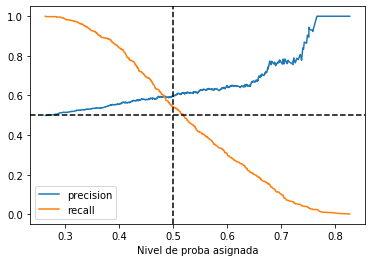

In [102]:
proba_estimate = best_model.predict_proba(Xtest)[:, 1]
prec, recall, threshold = precision_recall_curve(ytest, proba_estimate)

plt.plot(threshold, prec[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()
plt.axvline(x=0.5, linestyle="--", c="black")
plt.axhline(y=0.5, linestyle="--", c="black")
plt.xlabel("Nivel de proba asignada")